<a href="https://colab.research.google.com/github/kritika-gupta/IE406-machine-learning/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import expit

#### 1. Visualize the data given in files “ex2data1-logistic.xls” and “ex2data2-logistic.xls”
#### 2. Use data in files “ex2data1-logistic.xls” and “ex2data2-logistic.xls” to perform logistic regression for each of these data sets. Use 90% data points from each set for training and remaining 10% for testing the accuracy of classification.

In [ ]:
def preprocess(df, train_ratio):
    idx = int(np.round(len(df)*train_ratio))
    shuffled_df = df.sample(frac = 1).reset_index(drop = True)
    train = shuffled_df[0:idx]
    test = shuffled_df[idx:len(df)]
    assert(len(train) + len(test)==len(df))

    y_train = train['y'].to_numpy().reshape(len(train),1)
    y_test = test['y'].to_numpy().reshape(len(test),1)
    
    temp = train.drop('y', axis=1)
    print(temp.head())
    x_train = temp.to_numpy()
    x_test = test.drop('y', axis=1).to_numpy()

    x_train = (x_train - np.mean(x_train, axis = 0))/np.std(x_train, axis = 0)
    x_test = (x_test - np.mean(x_test, axis = 0))/np.std(x_test, axis = 0)
    x_train = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
    x_test = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)

    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)
    return x_train, y_train, x_test, y_test

In [ ]:
def cost_fn(X, Y, w):
    predicted = expit(np.matmul(X, w))
    error = np.zeros((len(Y), 1))
    for i in range(len(Y)):
        error[i] = -Y[i]*np.log(predicted[i]) - (1-Y[i])*np.log(1 - predicted[i])
    cost = np.mean(error)
    return cost

In [ ]:
def logistic_gd(X, Y, alpha, threshold):
    samples = X.shape[0]
    w = np.random.rand(X.shape[1], 1)
    print(X.shape, w.shape, Y.shape)
    steps = 1
    history = []
    while(True):
        w_ = w + (1/samples)*(alpha)*np.matmul(X.T, (Y - expit(np.matmul(X, w))))
        history.append(cost_fn(X, Y, w_))
        
        if(np.all(abs(w - w_) < threshold)):
            break
        w = w_
        steps = steps + 1
        
    plt.figure()
    plt.plot(history)
    plt.title(r"Gradient Descent, $\alpha = %0.2f$"%alpha)
    plt.xlabel("iteration")
    plt.ylabel("cost")
    plt.show()
    return w

In [ ]:
def predict_on_test(X, Y, w):
    y_pred = expit(np.matmul(X, w))
    print(y_pred)
    print(Y)
    correct = np.where((np.round(y_pred) == Y)==True)[0]
    wrong = np.where((np.round(y_pred) == Y)==False)[0]
#     assert(correct + wrong == Y.shape[0])
#     print(correct, " out of ", correct+wrong," samples classfied correctly")
    return correct, wrong

In [ ]:
def plot_db(df, weights):
    x1, x2, y = df['x1'], df['x2'], df['y']
    x1 = (x1 - np.mean(x1))/np.std(x1)
    x2 = (x2 - np.mean(x2))/np.std(x2)
    sns.scatterplot(x1, x2, hue = y)
    w0, w1, w2 = weights

    slope = -(w1/w2) 
    intercept = -w0/w2

    x_range = np.linspace(min(x1), max(x1), 10)
    line = x_range*slope + intercept
    plt.plot(x_range,line, 'r-')
    

In [ ]:
def run(df):
    x_train, y_train, x_test, y_test = preprocess(df, 0.9)
    alpha = 0.1
    threshold = 0.00001

    weights = logistic_gd(x_train, y_train, alpha, threshold)
    correct, wrong = predict_on_test(x_test, y_test, weights)
    
    return correct, wrong, x_test, y_test, weights

## Load data

In [ ]:
data_file_1 = "ex2data1-logistic.csv"
data_file_2 = "ex2data2-logistic.csv"
df1 = pd.read_csv(data_file_1).astype('float')
df2 = pd.read_csv(data_file_2).astype('float')


## Visualize

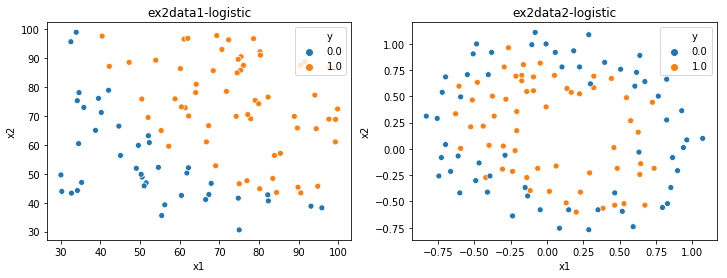

In [ ]:
plt.figure(figsize = (12, 4))
plt.subplot(1,2,1)
plt.title("ex2data1-logistic")
sns.scatterplot(df1['x1'], df1['x2'], hue = df1['y'])
plt.subplot(1,2,2)
plt.title("ex2data2-logistic")
sns.scatterplot(df2['x1'], df2['x2'], hue = df2['y'])

## Dataset 1

(90, 3) (90, 1)
(10, 3) (10, 1)
(90, 3) (3, 1) (90, 1)


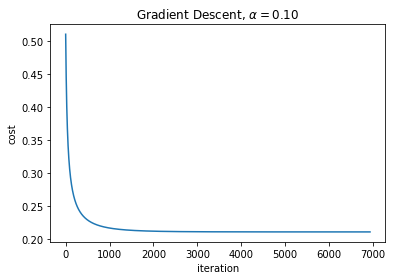

9  out of  10  samples classfied correctly
weights =  [[1.41538534]
 [3.90190685]
 [3.62182964]]


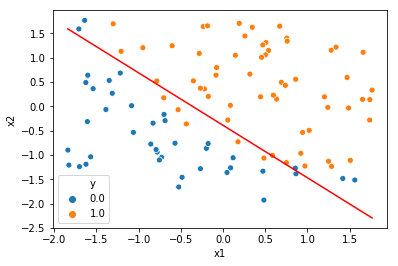

In [ ]:
weights = run(df1)
print("weights = ", weights)
plot_db(df1, weights)

## Dataset 2

In [ ]:
df2 = pd.read_csv(data_file_2).astype('float')
df2['x3'] = df2['x1']**2
df2['x4'] = df2['x2']**2

         x3        x4
0  0.352705  0.000026
1  0.394962  0.111596
2  0.677592  0.075944
3  0.050212  0.274702
4  0.300096  0.499665
(106, 3) (106, 1)
(12, 3) (12, 1)
(106, 3) (3, 1) (106, 1)


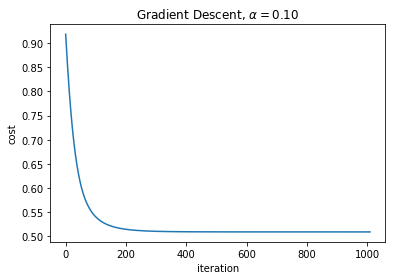

[[0.68952671]
 [0.19763072]
 [0.76417732]
 [0.62968958]
 [0.8210828 ]
 [0.581026  ]
 [0.13830807]
 [0.93141292]
 [0.14302667]
 [0.56897755]
 [0.19514028]
 [0.23440978]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [ ]:
c, w, x_test, y_test, weights = run(df2[['x3', 'x4', 'y']])

In [ ]:
weights

array([[-0.03166708],
       [-1.54798255],
       [-1.07406034]])

<a list of 9 text.Text objects>

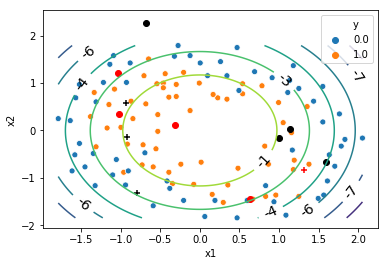

In [ ]:
x1, x2, y = df2['x1'], df2['x2'], df2['y']
x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)
sns.scatterplot(x1, x2, hue = y)
choice = lambda y : "+" if y==1 else "o"
for i in c:
    plt.scatter(x_test[i, 1], x_test[i, 2], color = 'k', marker = choice(y_test[i]))
for i in w:
    plt.scatter(x_test[i, 1], x_test[i, 2], color ='r', marker = choice(y_test[i]))



w0, w3, w4 = weights

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)
X1, X2 = np.meshgrid(x1_, x2_)

F = w0 + 0*(X1) + 0*(X2) + w3*(X1**2) + w4*(X2**2)
C = plt.contour(X1, X2, F)
plt.clabel(C, fmt = '%2.1d', colors = 'k', fontsize=14)

In [ ]:
for i in c:
    print(x_test[i, 1])

-0.0657456735366481
0.8970570770000397
-0.7610993465824817
1.5121597769631647
-0.8680696919585649
0.388901508362352
0.21507005431608736
0.40227280153436246
-1.0552910104173567


In [ ]:
w0, w1, w2 = weights_1
x1 = df3['x1']
x2 = df3['x2']
x = np.arange(min(x1), max(x1), 0.1)
y = np.arange(min(x2), max(x2), 0.1)

X, Y = np.meshgrid(x,y)

In [ ]:
Z = w0 + (w1*(X))+(w2*(Y))
# (x_, y_) = np.where(Z==(w0**2))
# print(x_, y_)
print(w0**2)

[0.00368451]


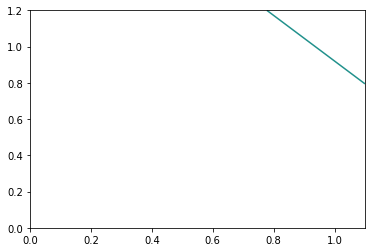

In [ ]:
plt.contour(X, Y, Z, levels=0)

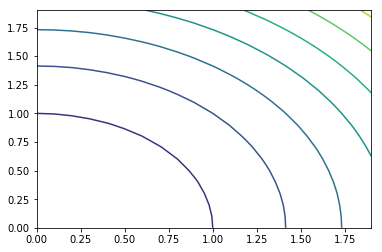

In [ ]:
plt.contour(X, Y, X**2+Y**2)